In [16]:
import warnings

warnings.filterwarnings('ignore')

# Contents

1. Joint Probability Distributions
2. Marginal Probability (Sum Rule)
3. Conditional Probability
4. Product Rule
5. Visualization
6. Expectation and Variance

### 1. Joint Probability Distributions

The joint probability of two random variables 𝑋 and 𝑌, denoted P(X,Y), describes the probability that X takes on a specific value x, and Y takes on a specific value y, simultaneously. It represents the likelihood of two events happening together.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
data = {
    'Sunny': {'Happy': 0.4, 'Sad': 0.1},
    'Rainy': {'Happy': 0.2, 'Sad': 0.3}
}
df = pd.DataFrame(data)
df.head()

,Sunny,Rainy
Happy,0.4,0.2
Sad,0.1,0.3


In [19]:
joint_prob = df / df.values.sum()
print("Joint Probability Distribution:")
print(joint_prob)

Joint Probability Distribution:
       Sunny  Rainy
Happy    0.4    0.2
Sad      0.1    0.3


Here, the probability that it is Sunny **and** the person is Happy is 0.4(40%).
Joint probabilities desciribe the simultaneuos occurence of events. 

### 2. Marginal Probability (Uses Sum Rule)

The marginal probability of a random variable X, denoted P(X), is the probability of X irrespective of the value of Y. It is obtained by summing (or integrating) over the other variable in the joint distribution

#### Sum Rule:
The marginal probability of X(probability of X) is obtained by summing over all possible outcomes of Y. This is the **sum rule**. \
$P(X=x)=\sum_yP(X=x, Y=y)$

In [20]:
# X = Weather, Y = Mood
# Marginal probabilities
P_X = joint_prob.sum(axis=1) # along weather, i.e. 0.4+0.2 for happy, 0.1+0.3 for sad
P_Y = joint_prob.sum(axis=0) # along mood

print("\nMarginal Probability of Weather (P(X)):")
print(P_X)

print("\nMarginal Probability of Mood (P(Y)):")
print(P_Y)


Marginal Probability of Weather (P(X)):
Happy    0.6
Sad      0.4
dtype: float64

Marginal Probability of Mood (P(Y)):
Sunny    0.5
Rainy    0.5
dtype: float64


Here, there is a **60%** chance of being happy regardless of the weather!
So, Marginal probabilities provide the overall likelihood of a single variable.

### 3. Conditional Probability

The conditional probability of X given Y, denoted P(X∣Y), is the probability of X occurring given that Y has occurred. It is computed using the product rule:

$P(X|Y)=\frac{P(X,Y)}{P(Y)}$

where, ${P(X,Y)}$ is the joint probability of X and Y. \
$P(X)$ is the marginal probability of X.

In [21]:
# Conditional Probability of Mood given Weather
print('joint_prob:\n',joint_prob)
print()
print('P_X:\n', P_X)
P_Y_given_X = joint_prob.div(P_X, axis=0)

print("\nConditional Probability P(Y | X):")
print(P_Y_given_X)

joint_prob:
        Sunny  Rainy
Happy    0.4    0.2
Sad      0.1    0.3

P_X:
 Happy    0.6
Sad      0.4
dtype: float64

Conditional Probability P(Y | X):
          Sunny     Rainy
Happy  0.666667  0.333333
Sad    0.250000  0.750000


Here, $P(Y=Sunny|X=Happy)$ is: \
$\frac{P(Happy, Sunny)}{P(Happy)}$ i.e. $\frac{0.4}{0.6}=0.667$

### 4. Product Rule

The joint probability P(X, Y) can be derived from the conditional probability and marginal probability.

$P(X, Y)=P(X|Y).P(Y)$ \
OR \
$P(X, Y)=P(Y|X).P(X)$

In [26]:
joint_prob_from_product_rule = P_Y_given_X.mul(P_X, axis=0)

print("Joint Probability from Product Rule:\n", joint_prob_from_product_rule)

Joint Probability from Product Rule:
        Sunny  Rainy
Happy    0.4    0.2
Sad      0.1    0.3


### 5. Visualization


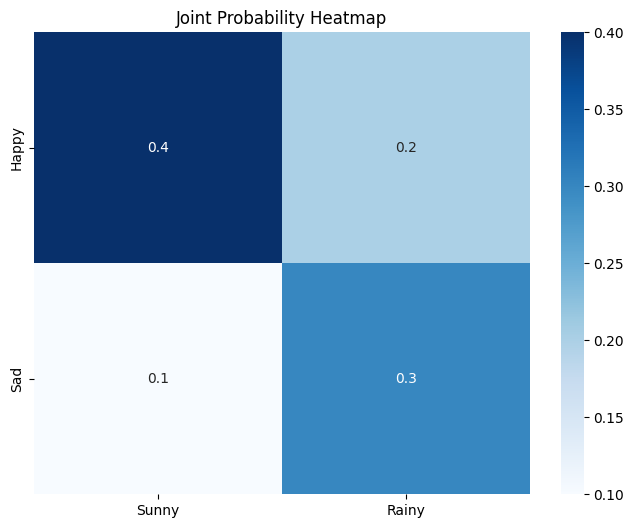

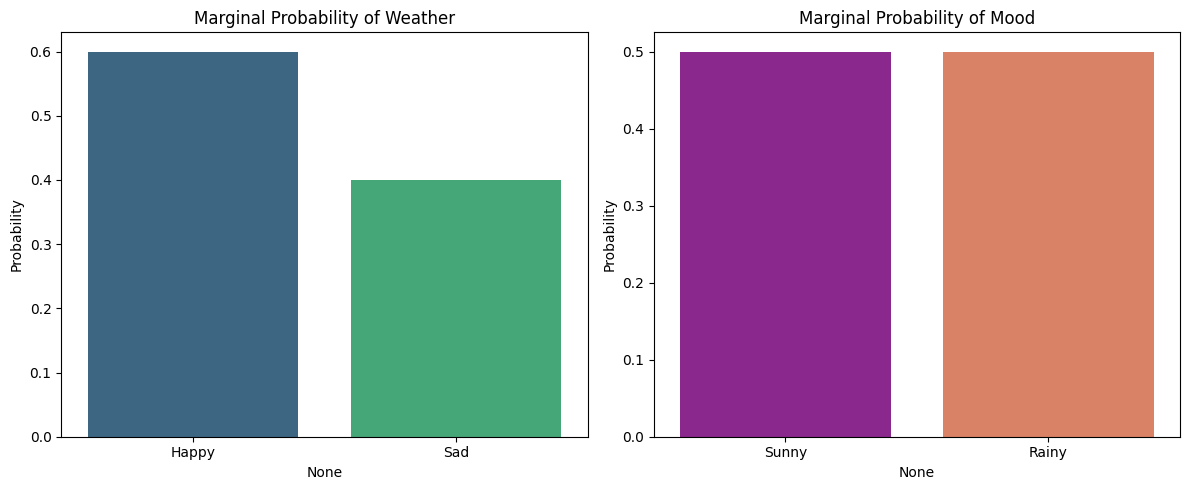

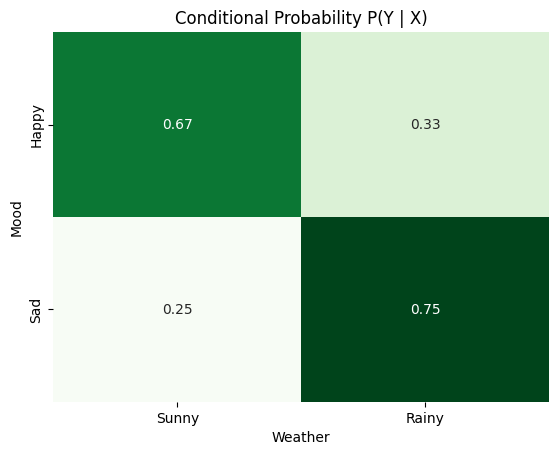

In [24]:

plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob, annot=True, cmap="Blues", cbar=True)
plt.title("Joint Probability Heatmap")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=P_X.index, y=P_X.values, ax=ax[0], palette="viridis")
ax[0].set_title("Marginal Probability of Weather")
ax[0].set_ylabel("Probability")

sns.barplot(x=P_Y.index, y=P_Y.values, ax=ax[1], palette="plasma")
ax[1].set_title("Marginal Probability of Mood")
ax[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()

# Heatmap of conditional probabilities
sns.heatmap(P_Y_given_X, annot=True, cmap="Greens", cbar=False)
plt.title("Conditional Probability P(Y | X)")
plt.xlabel("Weather")
plt.ylabel("Mood")
plt.show()

### 6. Expectation and Variance
* Expectation(Mean)
  The average or expected value of a random variable X.
  $$
  E[X]=\sum_{x}^{}x.P(X=x)
  $$
  
* Variation
  A measure of the spread of the random variable.
  $$
  Var(X)=E[X^2]-(E[X])^2
  $$

In [30]:
P_X, P_X.index 

(Happy    0.6
 Sad      0.4
 dtype: float64,
 Index(['Happy', 'Sad'], dtype='object'))

In [40]:
# Assign numeric values to the moods for calculation
mood_mapping = {"Happy": 1, "Sad": 0}
weather_mapping = {"Sunny": 1, "Rainy": 0}

# expectation for mood
E_mood = sum([mood_mapping[mood] * P_X[mood] for mood in P_X.index]) # x*P(X=x)

# variance for mood
E_mood_squared = sum([(mood_mapping[mood]**2)* P_X[mood] for mood in P_X.index]) # E[X^2]
Var_mood = E_mood_squared - (E_mood)**2

print(f"Expectation of Mood: {E_mood}")
print(E_mood_squared)
print(f"Variance of Mood: {Var_mood}")

Expectation of Mood: 0.6000000000000001
0.6000000000000001
Variance of Mood: 0.24
